# DATASET과 DATALOADER
- PyTorch는 `torch.utils.data.DataLoader` 와 `torch.utils.data.Dataset` 의 두 가지 데이터 기본 요소를 제공한다.


- 미리 준비된(pre-loaded) 데이터셋 뿐만 아니라 가지고 있는 데이터를 사용할 수 있도록 해준다.


- `Dataset`은 샘플과 정답(label)을 저장하고, `DataLoader`는 `Dataset`을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)로 감싼다.


- PyTorch는 다양한 pre-loaded 데이터셋이 있다. `torch.utils.data.Dataset`의 하위 클래스로 개별 데이터를 특정하는 함수가 구현되어 있다.


- 이러한 데이터셋은 모델을 만들어보고 성능을 측정하는데 사용할 수 있다.

# 데이터셋 불러오기
- *TorchVision* 에서 Fashion-MNIST 데이터셋을 불러오는 예제를 살펴보자.
- 60,000개의 학습 예제와 10,000개의 테스트 예제로 이루어져 있다.
- 각 예제는 흑백(grayscale)의 28*28 이미지와 10개 분류(class)중 하나인 정답(label)로 구성된다.


- 다음 매개변수들을 사용하여 FashionMNIST 데이터셋을 불러온다.
    - `root` 는 학습/테스트 데이터가 저장되는 경로이다.
    - `train` 은 학습용 또는 테스트용 데이터셋 여부를 지정한다.
    - `download=True` 는 `root` 에 데이터가 없는 경우 인터넷에서 다운로드한다.
    - `transform` 과 `target_transform` 은 특징(feature)과 정답(label)을 변형(transform)을 지정한다.

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor())

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# 데이터셋을 순회하고 시각화하기
- `Dataset` 에 리스트(list)처럼 직접 접근(index)할 수 있습니다.
- `training_data[index]` , `matplotlib` 을 사용하여 학습 데이터 일부를 시각화해보자.

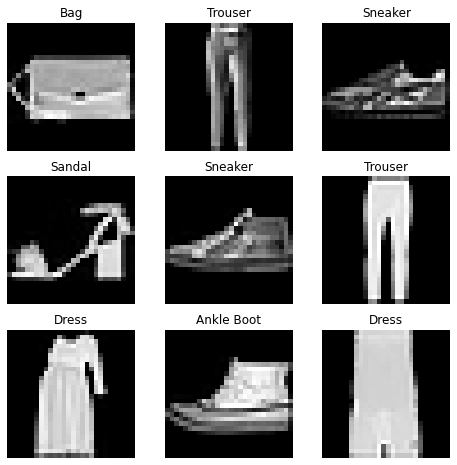

In [7]:
labels_map = {0: "T-Shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
              5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

fig = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    
    fig.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
    # img의 shape => (1, 28, 28)이기 때문에 squeeze 해줌.

plt.show()

# 파일에서 사용자 정의 데이터셋 만들기
- 사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 한다.
    - `__init__`
    - `__len__`
    - `__getitem__`
- 아래 구현은 FashionMNIST 이미지들은 `img_dir` 디렉터리에 저장되고, 정답은 `annotations_file` csv 파일에 별도로 저장된다.

In [8]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform = None, target_transform = None):
        self.img_lables = pd.read_csv(annotation_file, names = ['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.ilocp[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)

        if self.target_transform:
            label = self.target_transform(label)

        return image, label

##`__init__`
- `__init__` 함수는 Dataset 객체가 생성(instantiate)될 때 한 번만 실행된다.
- 여기서는 이미지와 주석 파일(annotation_file)이 포함된 디렉터리와 두가지 변형(transform)을 초기화한다.


labels.csv 파일은 다음과 같다.

----
tshirt1.jpg, 0

tshirt2.jpg, 0

......

ankleboot999.jpg, 9

----

## `__len__`
- `__len__` 함수는 데이터셋의 샘플 개수를 반환한다.

## `__getitem__`
- `__getitem__` 함수는 주어진 인덱스 `idx`에 해당하는 샘플을 데이터셋에서 불러오고 반환한다.
- 인덱스를 기반으로, 디스크에서 이미지의 위치를 식별하고, `read_image` 를 사용하여 이미지를 텐서로 변환한다.
- `self.img_labels` 의 csv 데이터로부터 해당하는 정답(label)을 가져오고, 변형(transform) 함수들을 호출한 뒤
- 텐서 이미지와 라벨을 Python 사전(dict)형으로 반환한다.

# DataLoader로 학습용 데이터 준비하기
- `Dataset` 은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 한다.
- 모델을 학습할 때, 일반적으로 샘플들을 '미니배치(minibatch)'로 전달한다.
- 매 에포크(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, Python의 `multiprocessing`을 사용하여 데이터 검색 속도를 높인다.


- `DataLoader`는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체(iterable)이다.

In [9]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

# DataLoader를 통해 순회하기(iterate)
- `DataLoader` 에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회(iterate)할 수 있다.
- 아래의 각 순회(iteration)은 (각각 `batch_size=64` 의 특징(feature)과 정답(label)을 포함하는) `train_features`와 `train_labels`의 묶음(batch)을 반환한다.
- `shuffle=True` 로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞인다.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


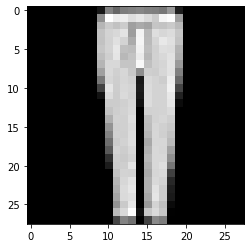

Label: 1


In [10]:
# 이미지와 정답(label)을 표시한다.
train_features, train_labels = next(iter(train_dataloader))
print("Feature batch shape: {}".format(train_features.size()))
print("Labels batch shape: {}".format(train_labels.size()))

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap='gray')
plt.show()

print("Label: {}".format(label))

In [12]:
train_features[0].shape

torch.Size([1, 28, 28])